# Importing Data and Cleaning

In [43]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#importing data from csv file
df = pd.read_csv('C:/Users/Volkan/Desktop/Visualization/Project/Austin_Animal_Center_Intakes.csv')
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


## Dropping Redundant Data
DateTime and MonthYear columns in both DataFrames appear to be redundant; if redundant, drop the 'MonthYear' column.

In [46]:
def dropdupcols(df,col1,col2):
    if (df[col1] == df[col2]).mean() == 1:
        df.drop(columns=col2,inplace=True)
        print(df.dtypes)

dropdupcols(df,'DateTime','MonthYear')

Animal ID           object
Name                object
DateTime            object
Found Location      object
Intake Type         object
Intake Condition    object
Animal Type         object
Sex upon Intake     object
Age upon Intake     object
Breed               object
Color               object
dtype: object


In [47]:
df.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


## Converting data types to categories

In [48]:
df['Intake Type'] = df['Intake Type'].astype('category')
df['Intake Condition'] = df['Intake Condition'].astype('category')
df['Animal Type'] = df['Animal Type'].astype('category')
df['Sex upon Intake'] = df['Sex upon Intake'].astype('category')

In [49]:
print("Intakes Data Types\n",df.dtypes)

Intakes Data Types
 Animal ID             object
Name                  object
DateTime              object
Found Location        object
Intake Type         category
Intake Condition    category
Animal Type         category
Sex upon Intake     category
Age upon Intake       object
Breed                 object
Color                 object
dtype: object


## Check for missing values
* There are some null values in "Name" and "Sex upon Intake" columns of the dataframe that may or may not need to be handled:


In [50]:
print("Intakes\n")    
for col in df.columns:
    missing = df[col].isnull().mean()
    print(f'{col} - {missing :.3%}')

Intakes

Animal ID - 0.000%
Name - 31.462%
DateTime - 0.000%
Found Location - 0.000%
Intake Type - 0.000%
Intake Condition - 0.000%
Animal Type - 0.000%
Sex upon Intake - 0.001%
Age upon Intake - 0.000%
Breed - 0.000%
Color - 0.000%


## Replacement/Adjustment of Null Values
* Name
    * No replacement necessary, as many intakes don't have names.
* Sex upon Intake/Sex upon Outcome
    * Null values should be replaced with "Unknown"


In [51]:
#Name null values should be replaced with "Unknown".
df['Sex upon Intake'].fillna("Unknown",inplace=True)

In [53]:
df['Sex upon Intake'].isnull().mean()

0.0

## Converting the Age Column
Age columns are listed as strings with varying units, so these need to be converted to be plottable. We will convert this column into months with a float datatype. Negative ages are converted to null values.

In [55]:
def ageconvert(age):
    if age == "nan":

        return age
    
    split = str(age).split(' ',1)
   
    try:
        if split[1] == 'week' or split[1] == 'weeks':
            # The average number of weeks in a month is 4.345
            age_months = round(float(split[0])/4.345,1)
        if split[1] == 'year' or split[1] == 'years':
            age_months = float(split[0])*12
        if split[1] == 'day' or split[1] == 'days':
            age_months = round(float(split[0])/7/4.345,1)
        else: 
            age_months = float(split[0])
    except:
        age_months = np.nan

    if age_months < 0:
        # It is not possible for us to know what the negative ages were intended to be, so these are changed to null values.
        age_months = np.nan
    
    return age_months    
    
df['Age upon Intake Months'] = df['Age upon Intake'].apply(ageconvert)

# Analyzing the Data
The data is appropriately cleansed, and now we begin to try to answer some questions.

## Animal Age Analysis

In [57]:
df['Age upon Intake Months'].describe()

count    124113.000000
mean          3.376020
std           2.938813
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          25.000000
Name: Age upon Intake Months, dtype: float64

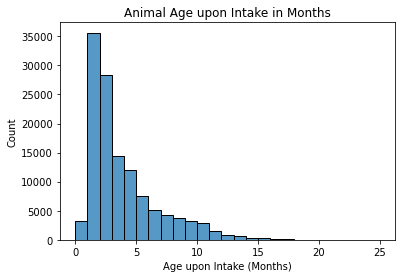

In [60]:
sns.histplot(x='Age upon Intake Months', data=df,binwidth=1)
plt.xlabel('Age upon Intake (Months)')
plt.title('Animal Age upon Intake in Months')
plt.show()

Text(0.5, 1.0, 'Age of Intakes by Species')

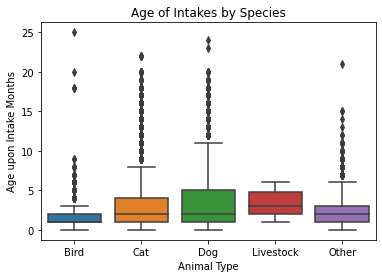

In [64]:
sns.color_palette()
sns.boxplot(data=df, x='Animal Type', y ='Age upon Intake Months')
plt.title('Age of Intakes by Species')

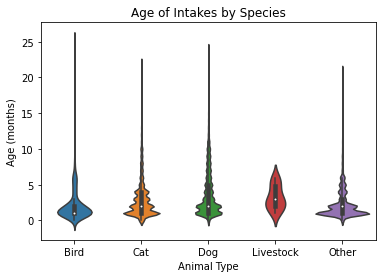

In [65]:
sns.violinplot(x='Animal Type', y='Age upon Intake Months', data=df)
plt.xlabel('Animal Type')
plt.ylabel('Age (months)')
plt.title('Age of Intakes by Species')
plt.show()

* The age of intakes is skewed towards the younger side, with very few animals being taken in at over a year old
    * Despite this, there is a relatively small number of animals that are taken in with an age of <1 month 
* Animals are about 3-1/3 months old upon intake on average
    

## The Presence of Animal Names

Text(0.5, 1.0, 'Count of Intakes with and without Names')

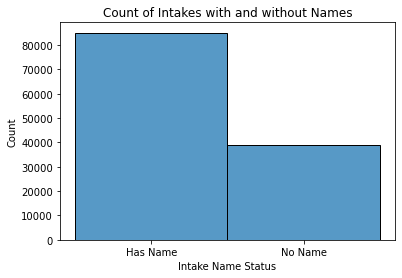

In [68]:
df['Named'] = df['Name'].isnull().map({True:'No Name', False:'Has Name'})

sns.histplot(data=df, x='Named')
plt.xlabel('Intake Name Status')
plt.title('Count of Intakes with and without Names')

* About 2/3rds of intakes (68.5%) come in with a name. This naturally means that the rest (31.5%) come in without a name. 

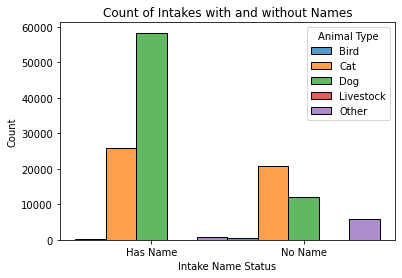

In [69]:
sns.histplot(data=df, x='Named', hue='Animal Type', multiple = 'dodge')
plt.xlabel('Intake Name Status')
plt.title('Count of Intakes with and without Names')

name_comp = df[['Animal ID','Animal Type','Named']].groupby(['Named','Animal Type']).count()
name_comp.rename(columns= {'Animal ID': 'Count'},inplace=True)
name_comp['Percentage'] = name_comp['Count'] / name_comp['Count'].sum()

name_comp.style.format({
    'Percentage': '{:,.2%}'.format,
})

* Other types are highly likely to have no name
    * This is likely explained by the fact that wildlife is included in the "Other" animal type.

## Repeated Intakes
Some animals are taken in multiple times. What differences exist between the group of animals that were only taken in once versus the group of animals that have been taken in multiple times?

In [86]:
intakes_dup = df[df['Animal ID'].duplicated(keep=False)]

intakes_uniq = df[~df['Animal ID'].duplicated(keep=False)]

In [78]:
dup_count = intakes_dup[['Intake Type','Animal Type','Animal ID']].groupby(['Intake Type','Animal Type']).count()
dup_count.rename(columns= {'Animal ID': 'Count'},inplace=True)
dup_count['Percentage'] = dup_count['Count']/ dup_count['Count'].sum()


uniq_count = intakes_uniq[['Intake Type','Animal Type','Animal ID']].groupby(['Intake Type','Animal Type']).count()
uniq_count.rename(columns= {'Animal ID': 'Count'},inplace=True)
uniq_count['Percentage'] = uniq_count['Count']/ uniq_count['Count'].sum()


dup_vs_uniq = dup_count.merge(uniq_count,left_index = True, right_index = True, suffixes=[" multiple intakes"," unique intakes"])

print(f"The total count of unique intakes is {uniq_count['Count'].sum()} ")
print(f"The total count of multiple intakes is {dup_count['Count'].sum()} ")

dup_vs_uniq.style.format({
    'Percentage multiple intakes': '{:,.2%}'.format,
    'Percentage unique intakes': '{:,.2%}'.format,
})


The total count of unique intakes is 100823 
The total count of multiple intakes is 23297 


<Figure size 432x288 with 0 Axes>

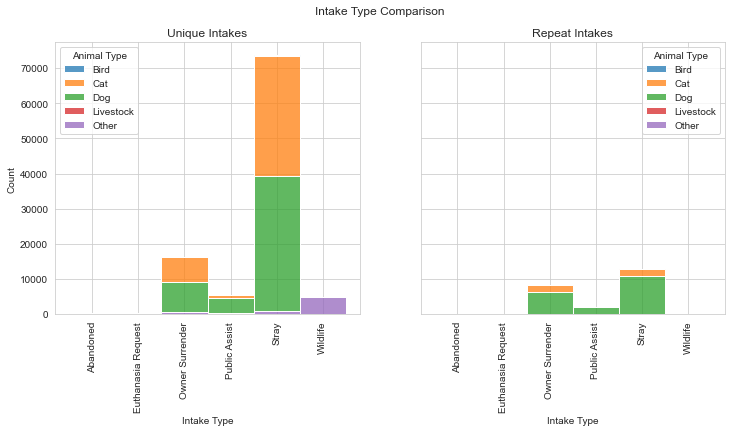

In [79]:
plt.clf()



fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,5))
_ = fig.suptitle('Intake Type Comparison')


_ = sns.histplot(intakes_uniq, x='Intake Type', hue='Animal Type', multiple='stack', ax=ax[0])
_ = ax[0].set_title('Unique Intakes')
_ = ax[0].tick_params(axis='x', rotation=90)


_ = sns.histplot(intakes_dup, x='Intake Type', hue='Animal Type', multiple='stack', ax=ax[1])
_ = ax[1].set_title('Repeat Intakes')
_ = ax[1].tick_params(axis='x', rotation=90)


plt.show();

### Immediate Takeaways

* Wildlife, somewhat obviously, is almost never taken in multiple times (only 8 instances in a dataset containing 124k intakes)
* Dogs account for the large majority of animals that were taken in multiple times (82.4%), but only about half of the animals that had been taken in a single time at the time the dataset was assembled(50.8%).
